<a href="https://colab.research.google.com/github/ROHAN010501/Car_price_prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Car Price Prediction Model  🚗 🚙 📈

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

### Loading the dataset

In [2]:
df0 = pd.read_csv(r"https://github.com/ROHAN010501/data/raw/refs/heads/main/Car%20details%20v3.csv")
df = df0.copy()

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
#check for duplicates
df.duplicated().sum()

1202

In [8]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
#checking for null values
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,208
engine,208


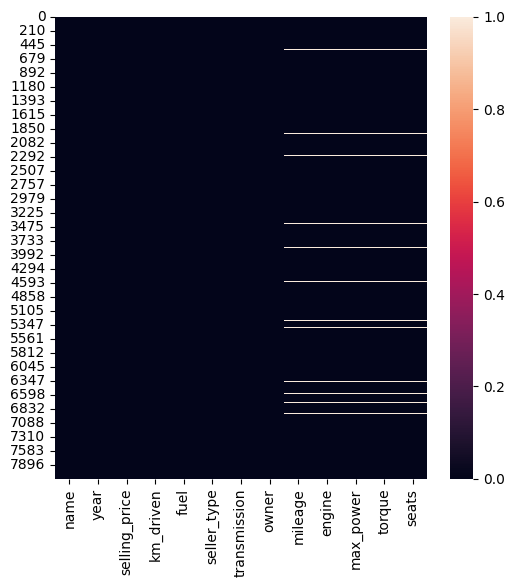

In [10]:
#using heatmap to show if there are any null values
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull())
plt.show()

In [11]:
#dropping null values
df.dropna(subset='mileage',inplace=True)

In [12]:
#dropping torque as it contains too many random and improper values
df.drop('torque',axis=1,inplace=True)

### EDA and Visualisations

In [13]:
# columns od dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [14]:
#checking unique values
df.nunique()

,0
name,1983
year,27
selling_price,670
km_driven,898
fuel,4
seller_type,3
transmission,2
owner,5
mileage,393
engine,121


In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [16]:
# Removing ' kmpl' / 'km/kg' and converting to numeric
df['mileage'] = df['mileage'].str.replace(' kmpl', '')
df['mileage'] = df['mileage'].str.replace(' km/kg', '')
df['mileage'] = df['mileage'].astype(float)

In [17]:
#removing 'CC' and converting to numeric
df['engine'] = df['engine'].str.replace(' CC', '').astype('int')

In [18]:
#removing 'bhp' and converting to numeric
df['max_power'] = df['max_power'].astype(str)

df['max_power'] = df['max_power'].str.replace(' bhp', '')

# there is one value with ' ' value we will replace it with NaN and drop it
df['max_power'] = df['max_power'].replace('', np.nan)

df['max_power'] = df['max_power'].astype(float)

In [19]:
df.dropna(subset=['max_power'])
df['max_power']


,max_power
0,74.00
1,103.52
2,78.00
3,90.00
4,88.20
...,...
8121,67.10
8122,88.73
8123,82.85
8124,110.00


In [20]:
#data description
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.00000,6718.000000,6717.000000,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,19.46531,1430.891337,87.766100,5.434653
std,3.900648,5.235398e+05,5.869980e+04,4.04915,493.493277,31.724555,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.80000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,19.44000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.50000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,400.000000,14.000000


In [21]:
#dropping 'name' column as it contains multiple names
df.drop('name',axis=1,inplace=True)

In [22]:
df['selling_price'].value_counts()

,count
selling_price,
300000,208
350000,196
600000,167
400000,164
250000,161
...,...
426000,1
358000,1
348000,1


In [23]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


    year  count
0   2017    802
1   2016    691
2   2015    680
3   2018    607
4   2014    580
5   2012    576
6   2013    560
7   2011    535
8   2010    361
9   2019    347
10  2009    225
11  2008    192
12  2007    166
13  2006    102
14  2005     70
15  2020     63
16  2004     49
17  2003     36
18  2002     19
19  2000     15
20  1999     13
21  1998      9
22  1997      9
23  2001      6
24  1994      2
25  1996      2
26  1995      1


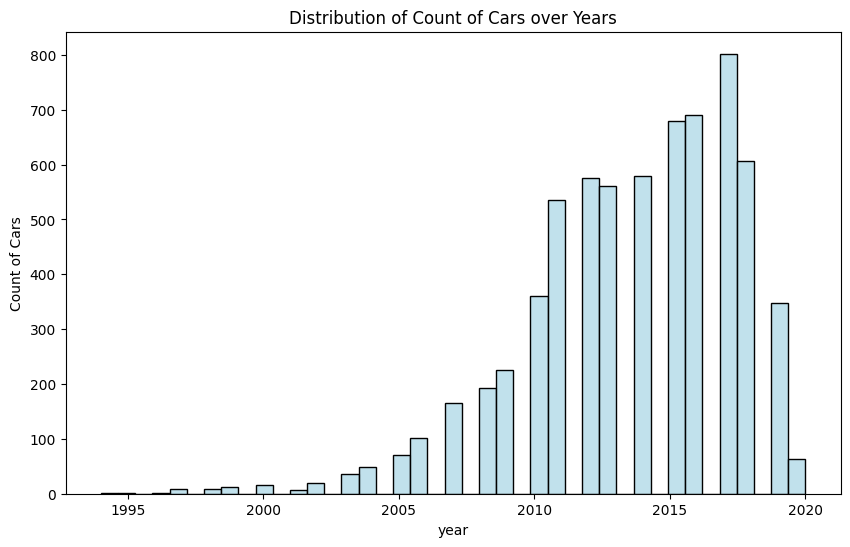

In [24]:
#visualizing Distribution of Count of Cars over Years using histplot

print(df['year'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of Count of Cars over Years')
plt.ylabel('Count of Cars')
sns.histplot(x='year',data=df, color='lightblue')
plt.show()

     selling_price  count
0           300000    208
1           350000    196
2           600000    167
3           400000    164
4           250000    161
..             ...    ...
665         426000      1
666         358000      1
667         348000      1
668         978999      1
669         746000      1

[670 rows x 2 columns]


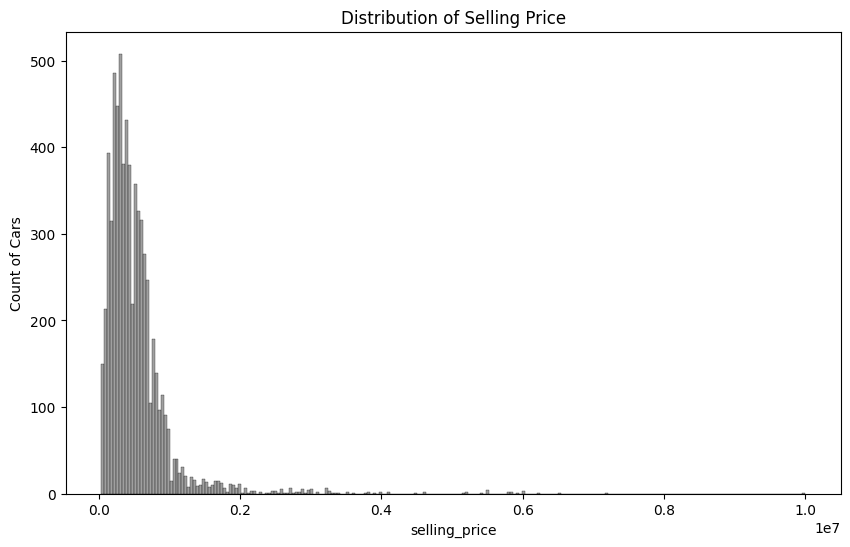

In [25]:
#visualizing Distribution of selling price using histplot

print(df['selling_price'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of Selling Price')
plt.ylabel('Count of Cars')
sns.histplot(x='selling_price',data=df, color='grey')
plt.show()

     km_driven  count
0       120000    487
1        70000    420
2        80000    405
3        60000    383
4        50000    346
..         ...    ...
893      68609      1
894      33360      1
895      14317      1
896      87237      1
897     191000      1

[898 rows x 2 columns]


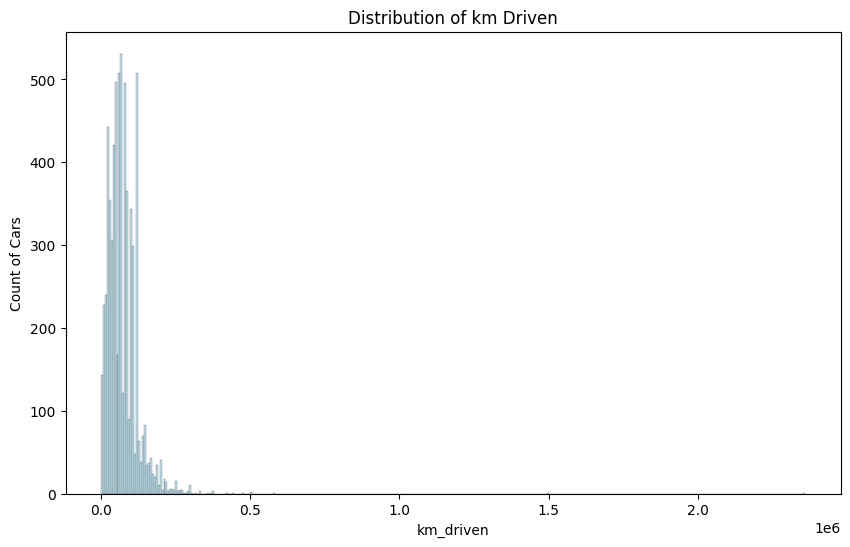

In [26]:
#visualizing Distribution of Km Driven using histplot

print(df['km_driven'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of km Driven')
plt.ylabel('Count of Cars')
sns.histplot(x='km_driven',data=df, color='lightblue')
plt.show()

     fuel  count
0  Diesel   3658
1  Petrol   2973
2     CNG     52
3     LPG     35


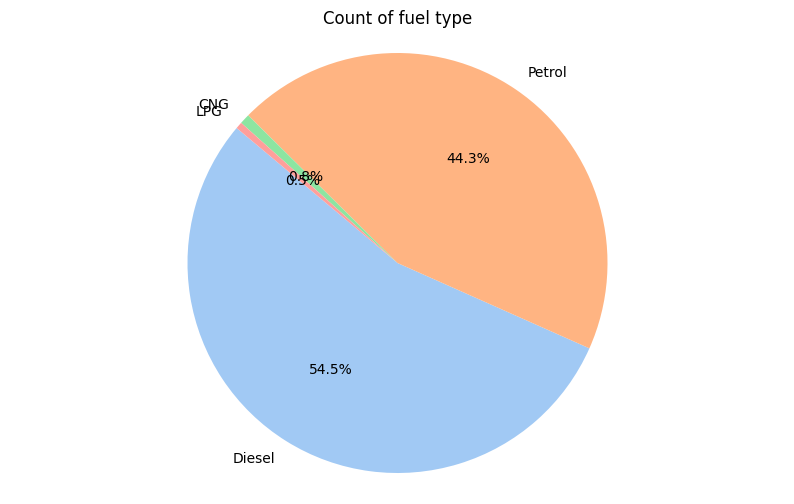

In [27]:
#visualising the fuel type cars pie plot
print(df['fuel'].value_counts().reset_index())
plt.figure(figsize=(10,6))
plt.pie(df['fuel'].value_counts(), startangle=140, labels=['Diesel','Petrol','CNG','LPG'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Count of fuel type')
plt.axis('equal')
plt.show()

        seller_type  count
0        Individual   6025
1            Dealer    666
2  Trustmark Dealer     27


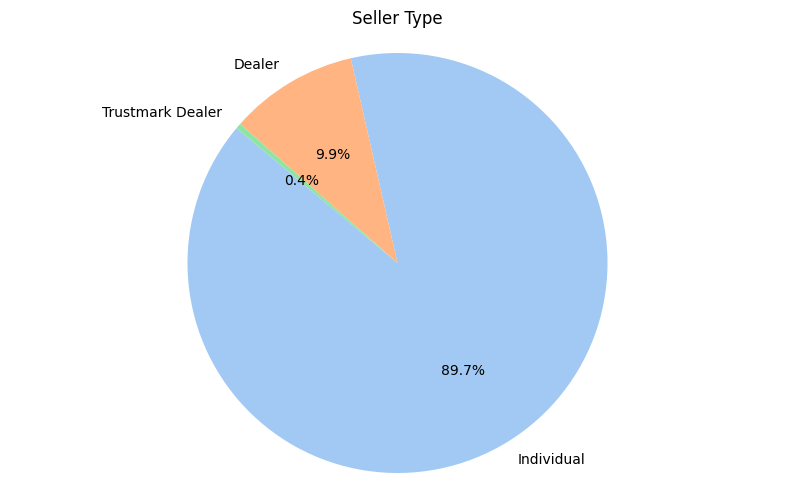

In [28]:
#visualising the seller type using pie plot
print(df['seller_type'].value_counts().reset_index())
plt.figure(figsize=(10,6))
plt.pie(df['seller_type'].value_counts(), startangle=140, labels=['Individual','Dealer','Trustmark Dealer'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Seller Type')
plt.axis('equal')
plt.show()

  transmission  count
0       Manual   6143
1    Automatic    575


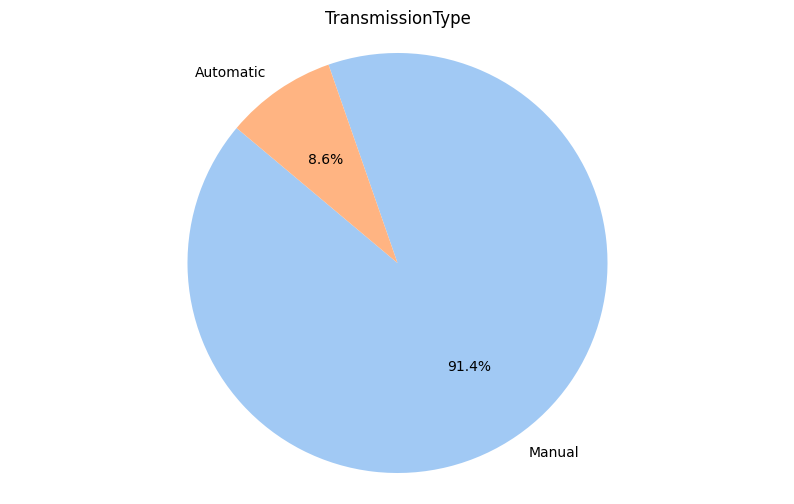

In [29]:
#visualising the transmission type using pie plot
print(df['transmission'].value_counts().reset_index())
plt.figure(figsize=(10,6))
plt.pie(df['transmission'].value_counts(), startangle=140, labels=['Manual','Automatic'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('TransmissionType')
plt.axis('equal')
plt.show()

                  owner  count
0           First Owner   4176
1          Second Owner   1889
2           Third Owner    493
3  Fourth & Above Owner    155
4        Test Drive Car      5


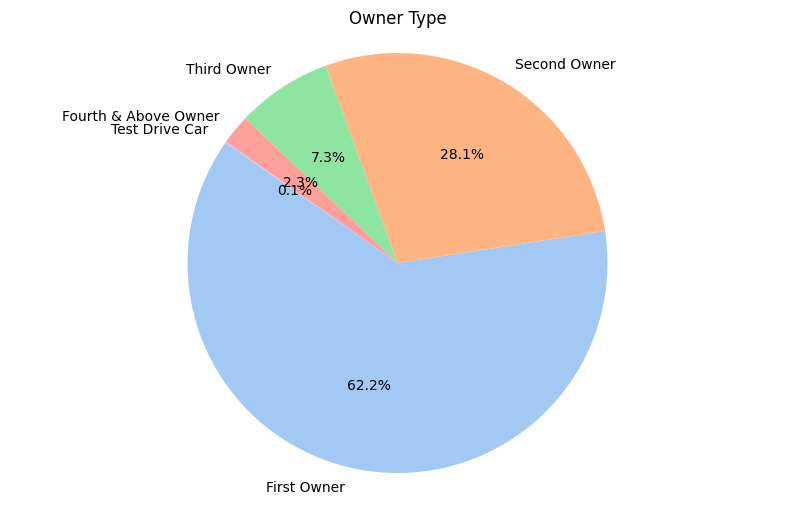

In [30]:
#visualising the owner type using pie plot
print(df['owner'].value_counts().reset_index())
plt.figure(figsize=(10,6))
plt.pie(df['owner'].value_counts(), startangle=145, labels=['First Owner','Second Owner','Third Owner','Fourth & Above Owner','Test Drive Car'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Owner Type')
plt.axis('equal')
plt.show()

     mileage  count
0      18.90    210
1      19.70    168
2      18.60    150
3      21.10    147
4      17.00    124
..       ...    ...
376    15.63      1
377    11.88      1
378    12.12      1
379    14.66      1
380    16.51      1

[381 rows x 2 columns]


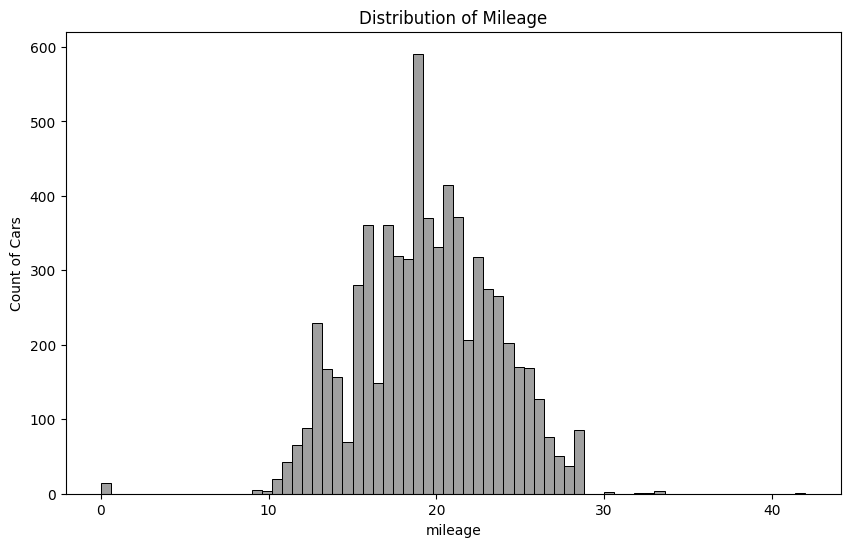

In [31]:
#visualizing Distribution of mileage using histplot

print(df['mileage'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of Mileage')
plt.ylabel('Count of Cars')
sns.histplot(x='mileage',data=df, color='grey')
plt.show()

     engine  count
0      1248    907
1      1197    698
2       796    421
3       998    398
4      2179    339
..      ...    ...
116    1489      1
117    1422      1
118    2496      1
119    3604      1
120    1950      1

[121 rows x 2 columns]


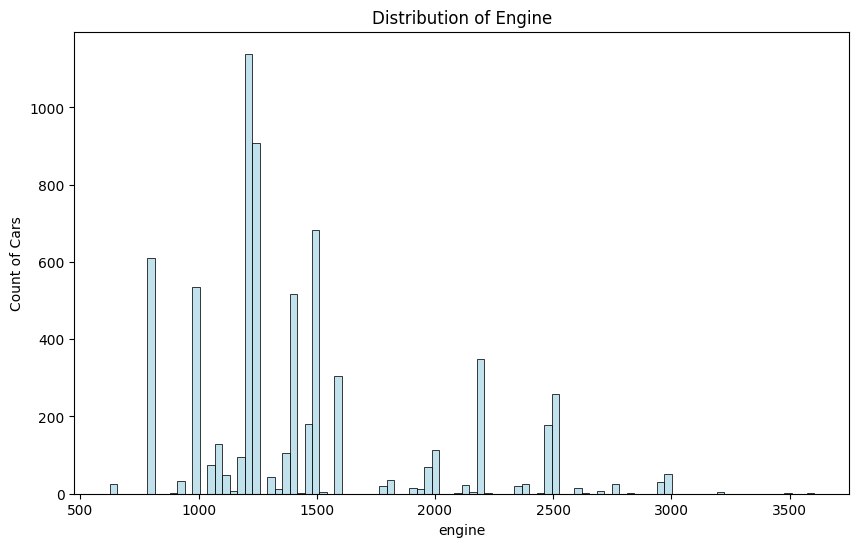

In [32]:
#visualizing Distribution of engine using histplot

print(df['engine'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of Engine')
plt.ylabel('Count of Cars')
sns.histplot(x='engine',data=df, color='lightblue')
plt.show()

     max_power  count
0        74.00    324
1        88.50    193
2        46.30    158
3        67.00    152
4        67.10    141
..         ...    ...
313     169.00      1
314     175.00      1
315      57.00      1
316      80.84      1
317     135.10      1

[318 rows x 2 columns]


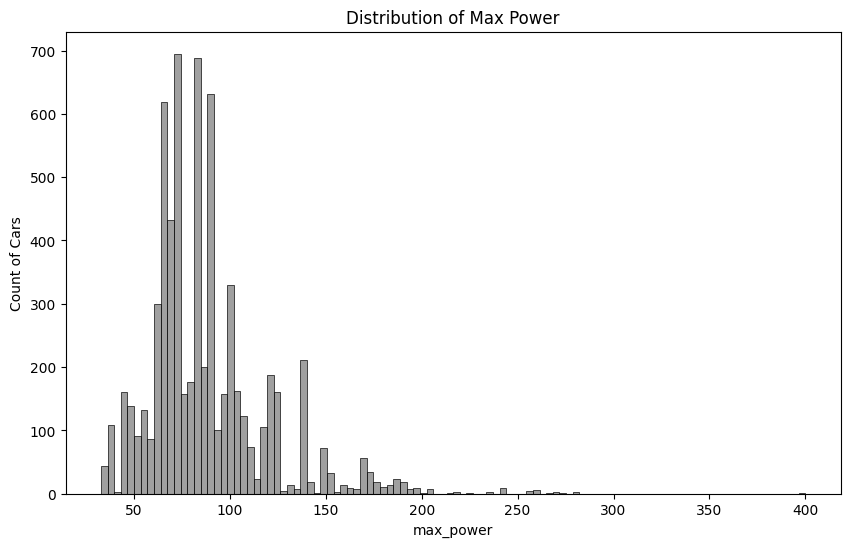

In [33]:

#visualizing Distribution of max_power using histplot

print(df['max_power'].value_counts().reset_index())

plt.figure(figsize=(10,6))
plt.title('Distribution of Max Power')
plt.ylabel('Count of Cars')
sns.histplot(x='max_power',data=df, color='grey')
plt.show()

   seats  count
0    5.0   5254
1    7.0    966
2    8.0    222
3    4.0    124
4    9.0     74
5    6.0     57
6   10.0     18
7    2.0      2
8   14.0      1


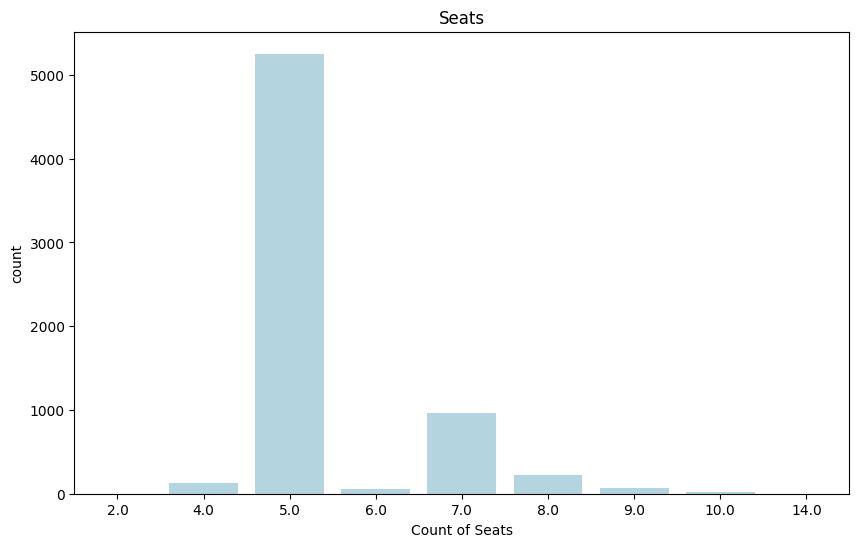

In [34]:
#visualizing count of seats using barplot
seats = df['seats'].value_counts().reset_index()
print(seats)

plt.figure(figsize=(10,6))
plt.title('Seats')
plt.xlabel('Count of Seats')
sns.barplot(x='seats', y='count' ,data=seats, color='lightblue')
plt.show()

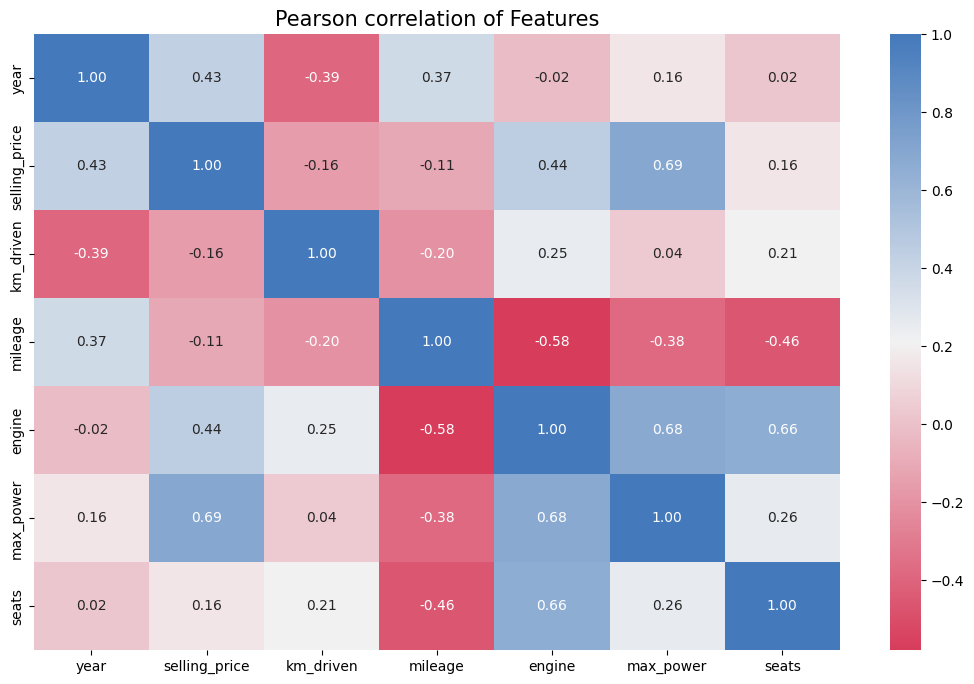

In [35]:
#pearson correlation map
df_numeric = df.select_dtypes(include=['float64','int64'])
corr = df_numeric.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(13, 8))
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.title('Pearson correlation of Features',fontsize=15)
plt.show()

### Handling the Outliers

In [36]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


In [37]:
# IQR outlier removal technique
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply the function to numeric columns
numeric_columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']

for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

# Display the DataFrame after outlier removal
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


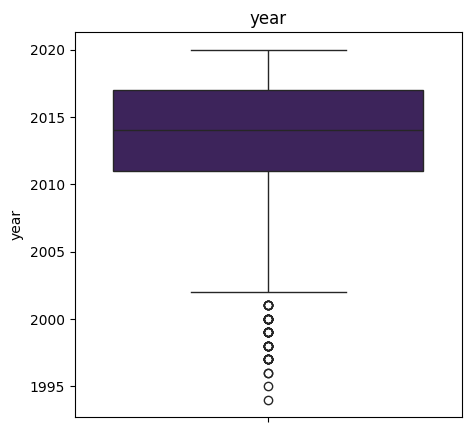

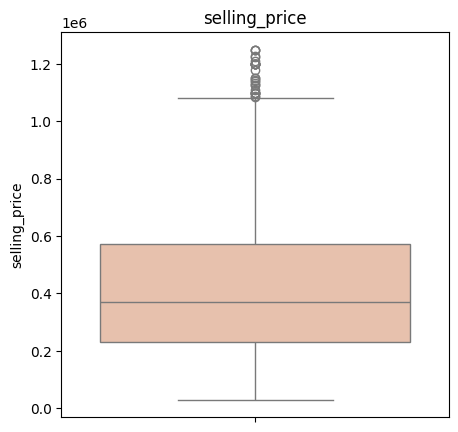

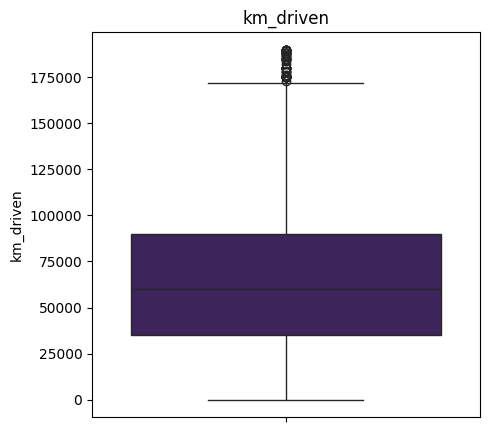

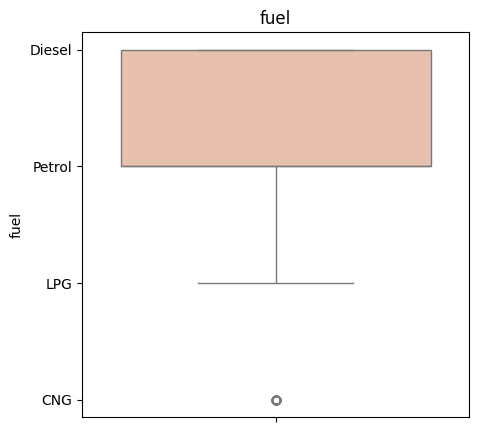

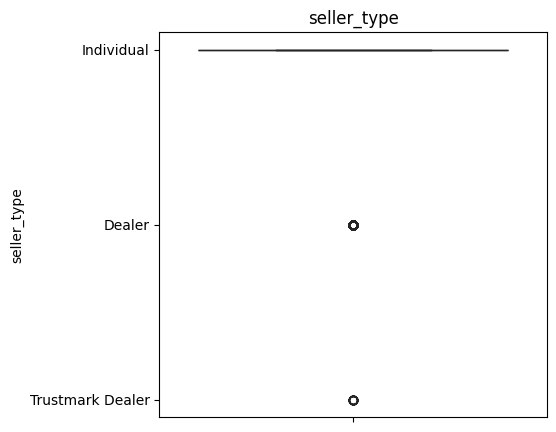

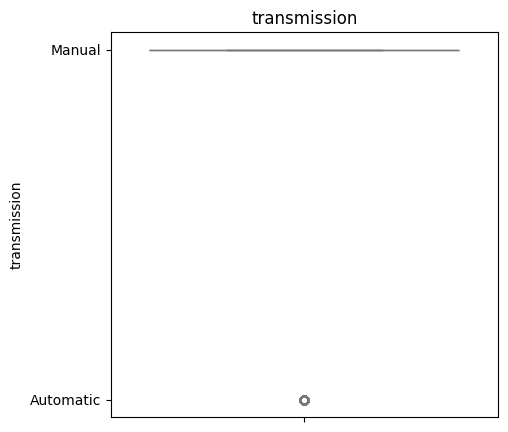

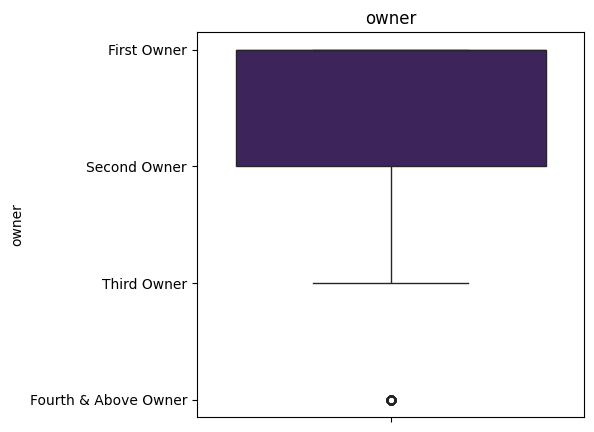

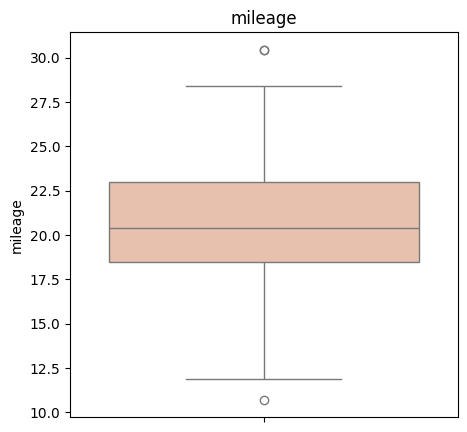

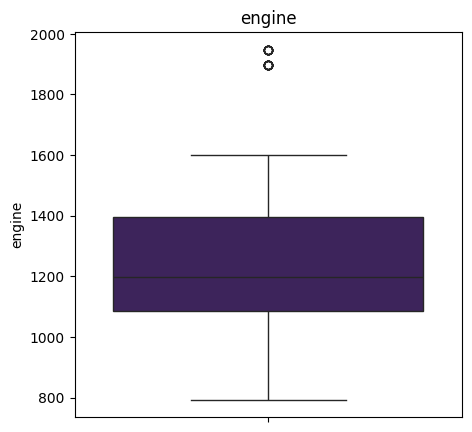

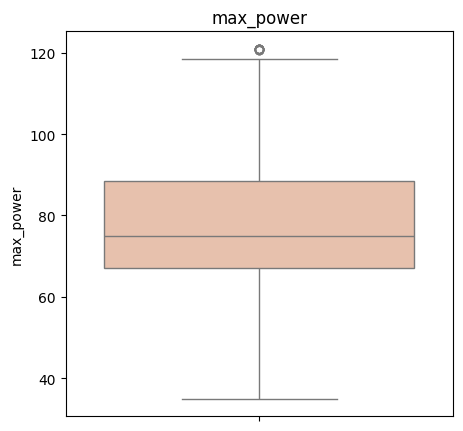

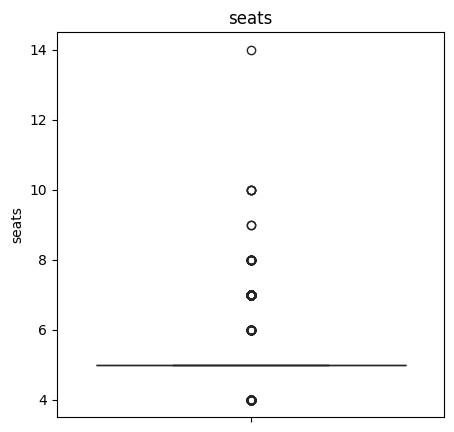

In [38]:
colors_ = ['#3c1b64','#f1bea3']*round(len(df.columns)/2+1)
i = 0
for var in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=var, data=df, color=colors_[i])
    plt.title(var)
    plt.show()
    i+=1

### Categorical Encoding

In [39]:
#Encode categorical columns
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])

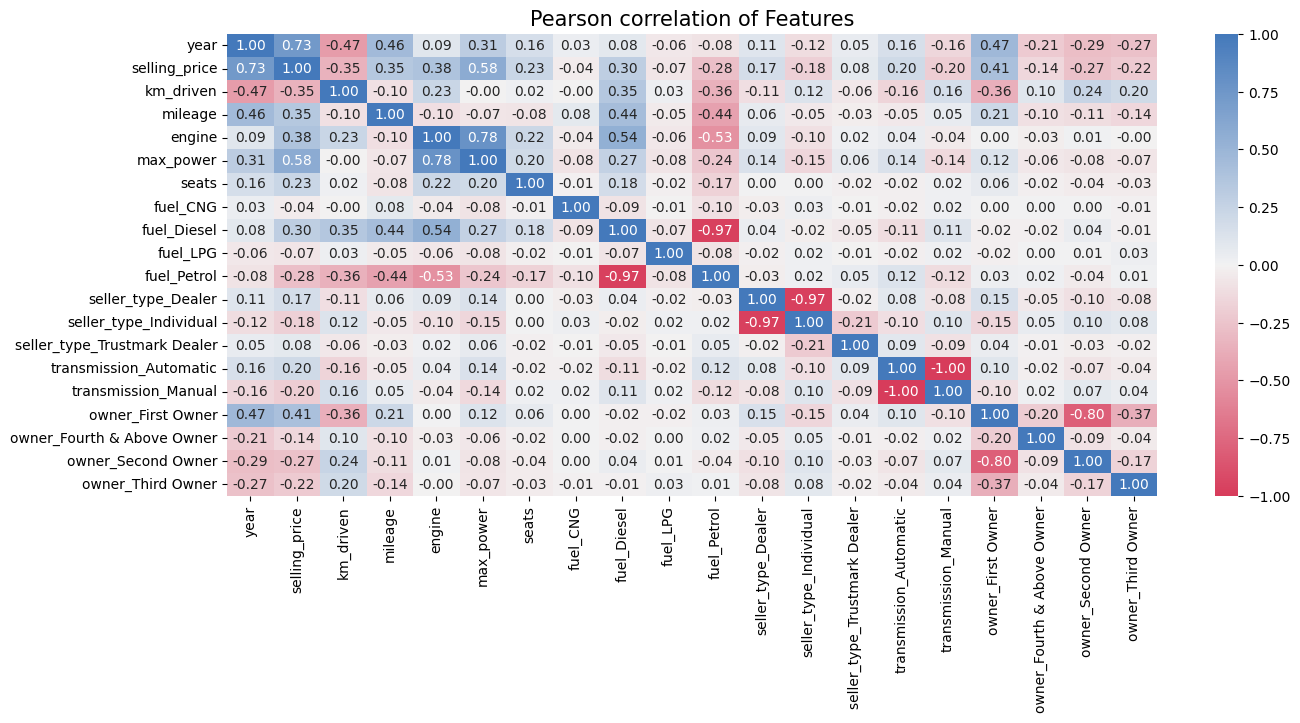

In [40]:
#pearson correlation map
corr_1 = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(15, 6))
sns.heatmap(corr_1, cmap=cmap, annot=True, fmt=".2f")
plt.title('Pearson correlation of Features',fontsize=15)
plt.show()

### Data Splitting

In [41]:
#contains all dependent variables
X = df.drop(['selling_price'], axis=1)

#contains dependent variable
y = df['selling_price']

#splitting in training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Scaling

In [42]:
# Scaling Independent variables
# using Standardscaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [43]:
# Scaling Dependent variable
# using Standardscaler
scaler_y = StandardScaler()
# transform 1D to 2D
y_train_array = y_train.values.reshape(-1,1)
y_train_og = y_train
# transform y_train
y_train_scaled = scaler_y.fit_transform(y_train_array)

y_train = y_train_scaled[:,0]

### ML model Training

##### Model 1 - LinearRegression

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#predict for train data
y_pred_for_train = model.predict(X_train)
y_pred_for_train = y_pred_for_train.reshape(-1,1)
y_pred_for_train = scaler_y.inverse_transform(y_pred_for_train)

In [46]:
#predict test data
y_pred_test = model.predict(X_test)
y_pred_test = y_pred_test.reshape(-1,1)
y_pred_test = scaler_y.inverse_transform(y_pred_test)

In [47]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train, y_pred_for_train)
mse_for_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train,y_pred_for_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 208381103740.9751
Mean Squared Error for test: 14273292187.90098
MAE for train: 419463.70
MAE for test: 92213.82
R-Squared: 0.74
Adjusted R-Squared 0.73


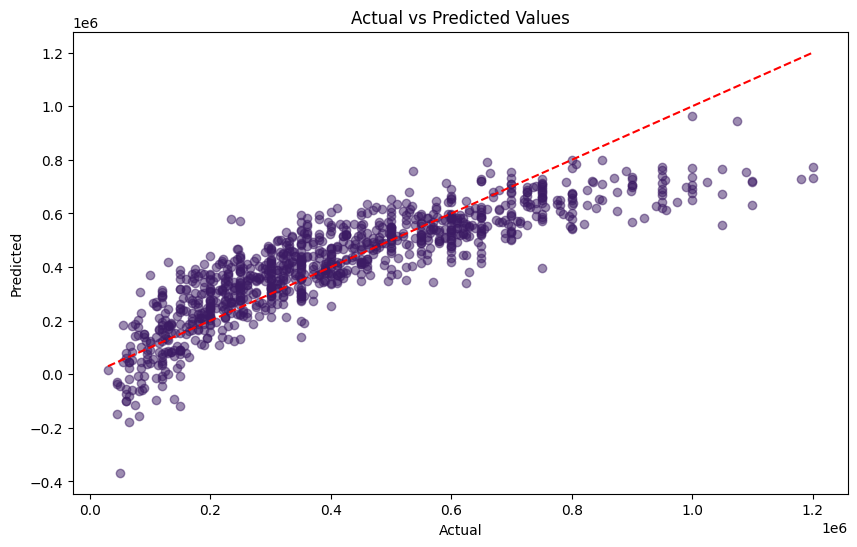

In [48]:
model_1_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test.ravel()})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_1_df['Actual'], model_1_df['Predicted'], alpha=0.5, color = "#3c1b64")
plt.plot([model_1_df['Actual'].min(), model_1_df['Actual'].max()], [model_1_df['Actual'].min(), model_1_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Model 2 - Lasso Regression

In [49]:
model_2 = Lasso(alpha=0.001)
model_2.fit(X_train, y_train)

Lasso(alpha=0.001)

In [50]:
#predict for train data
y_pred_train_ls = model_2.predict(X_train)
y_pred_train_ls = y_pred_train_ls.reshape(-1,1)
y_pred_train_ls = scaler_y.inverse_transform(y_pred_train_ls)

In [51]:
#predict test data
y_pred_test_ls = model_2.predict(X_test)
y_pred_test_ls = y_pred_test_ls.reshape(-1,1)
y_pred_test_ls = scaler_y.inverse_transform(y_pred_test_ls)

In [52]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train_og, y_pred_train_ls)
mse_for_test = mean_squared_error(y_test, y_pred_test_ls)
mae_train = mean_absolute_error(y_train_og,y_pred_train_ls)
mae_test = mean_absolute_error(y_test, y_pred_test_ls)
r2 = r2_score(y_test, y_pred_test_ls)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 14020054162.97676
Mean Squared Error for test: 14316398695.000254
MAE for train: 92181.95
MAE for test: 92297.86
R-Squared: 0.74
Adjusted R-Squared 0.73


In [53]:
model_2_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test_ls.ravel()})

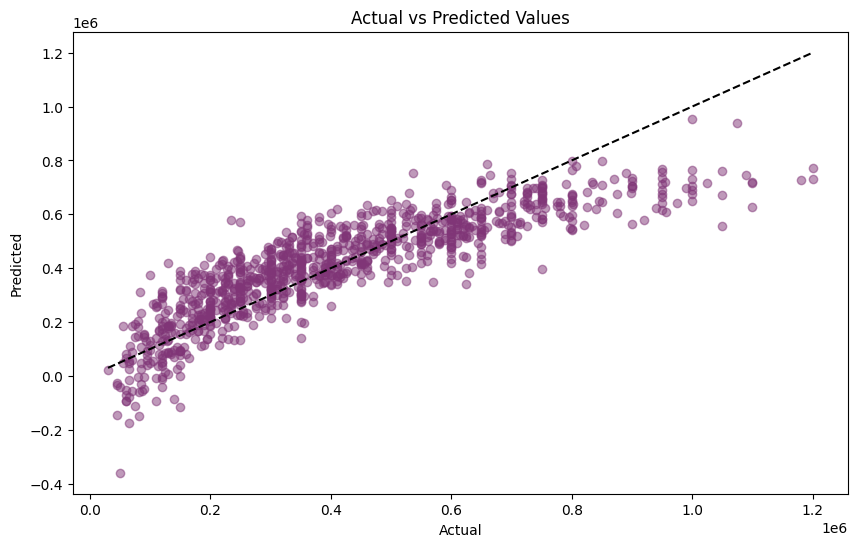

In [54]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_2_df['Actual'], model_2_df['Predicted'], alpha=0.5,color = "#803577")
plt.plot([model_2_df['Actual'].min(), model_2_df['Actual'].max()], [model_2_df['Actual'].min(), model_2_df['Actual'].max()], 'k--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Model 3 - XGBRegressor

In [55]:
model_3 = XGBRegressor()
model_3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
#predict for train data
y_pred_train_xg = model_3.predict(X_train)
y_pred_train_xg = y_pred_train_xg.reshape(-1,1)
y_pred_train_xg = scaler_y.inverse_transform(y_pred_train_xg)

In [57]:
#predict test data
y_pred_test_xg = model_3.predict(X_test)
y_pred_test_xg = y_pred_test_xg.reshape(-1,1)
y_pred_test_xg = scaler_y.inverse_transform(y_pred_test_xg)

In [58]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train_og, y_pred_train_xg)
mse_for_test = mean_squared_error(y_test, y_pred_test_xg)
mae_train = mean_absolute_error(y_train_og, y_pred_train_xg)
mae_test = mean_absolute_error(y_test, y_pred_test_xg)
r2 = r2_score(y_test, y_pred_test_xg)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 1440914331.972843
Mean Squared Error for test: 5295697239.016096
MAE for train: 27773.37
MAE for test: 53718.25
R-Squared: 0.90
Adjusted R-Squared 0.90


In [59]:
model_3_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test_xg.ravel()})

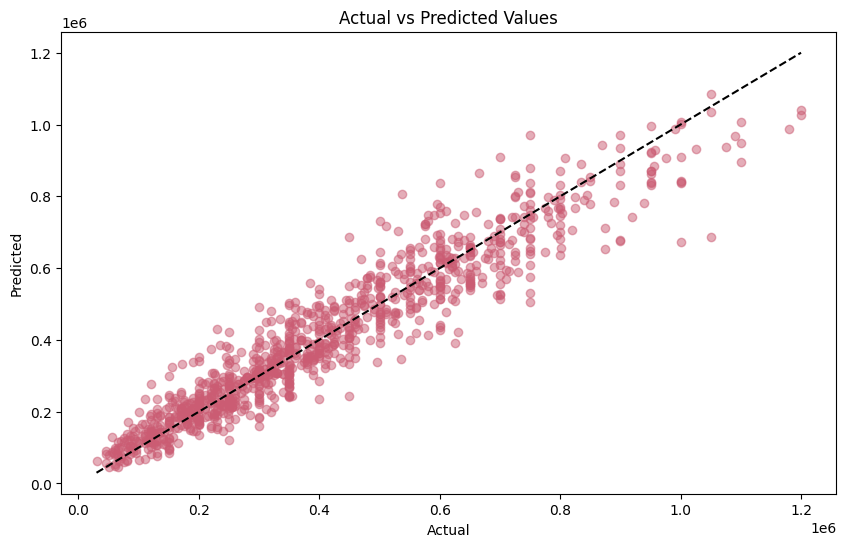

In [60]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_3_df['Actual'], model_3_df['Predicted'], alpha=0.5,color = "#cb5c73")
plt.plot([model_3_df['Actual'].min(), model_3_df['Actual'].max()], [model_3_df['Actual'].min(), model_3_df['Actual'].max()], 'k--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [61]:
model_3 = XGBRegressor()
from sklearn.model_selection import  GridSearchCV
# Define the parameter grid
''''param_grid = {
    'n_estimators': [300, 400, 500, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.1, 0.2, 0.5],
    'reg_alpha': [0.01, 0.05, 0.1, 1, 10],
    'reg_lambda': [1, 2, 5, 7, 10]
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)'''

"'param_grid = {\n    'n_estimators': [300, 400, 500, 600],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'max_depth': [3, 5, 7],\n    'subsample': [0.7, 0.8, 0.9],\n    'colsample_bytree': [0.1, 0.2, 0.5],\n    'reg_alpha': [0.01, 0.05, 0.1, 1, 10],\n    'reg_lambda': [1, 2, 5, 7, 10]\n}\n\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(estimator=model_3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\nprint(grid_search.best_params_)"

In [62]:
best_params ={'colsample_bytree': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators':600,
               'reg_alpha': 0.05, 'reg_lambda': 7, 'subsample': 0.7}


model_3_new = XGBRegressor(**best_params)
model_3_new.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.2, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
#predict for train data
y_pred_train_xg_new = model_3_new.predict(X_train)
y_pred_train_xg_new = y_pred_train_xg_new.reshape(-1,1)
y_pred_train_xg_new = scaler_y.inverse_transform(y_pred_train_xg_new)

In [64]:
#predict test data
y_pred_test_xg_new = model_3_new.predict(X_test)
y_pred_test_xg_new = y_pred_test_xg_new.reshape(-1,1)
y_pred_test_xg_new = scaler_y.inverse_transform(y_pred_test_xg_new)

In [65]:
#comparing the metrics for train and test

mse_for_train = mean_squared_error(y_train_og, y_pred_train_xg_new)
mse_for_test = mean_squared_error(y_test, y_pred_test_xg_new)
mae_train = mean_absolute_error(y_train_og, y_pred_train_xg_new)
mae_test = mean_absolute_error(y_test, y_pred_test_xg_new)
r2 = r2_score(y_test, y_pred_test_xg_new)

n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features (1 in this case)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))



print("Mean Squared Error for train:", mse_for_train)    ### To check if the model is underfitting or overfitting
print("Mean Squared Error for test:", mse_for_test)
print(f"MAE for train: {mae_train:.2f}")
print(f"MAE for test: {mae_test:.2f}")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared {adjusted_r2:.2f}")

Mean Squared Error for train: 4122613588.1188703
Mean Squared Error for test: 5713763644.536851
MAE for train: 47110.30
MAE for test: 55679.43
R-Squared: 0.89
Adjusted R-Squared 0.89


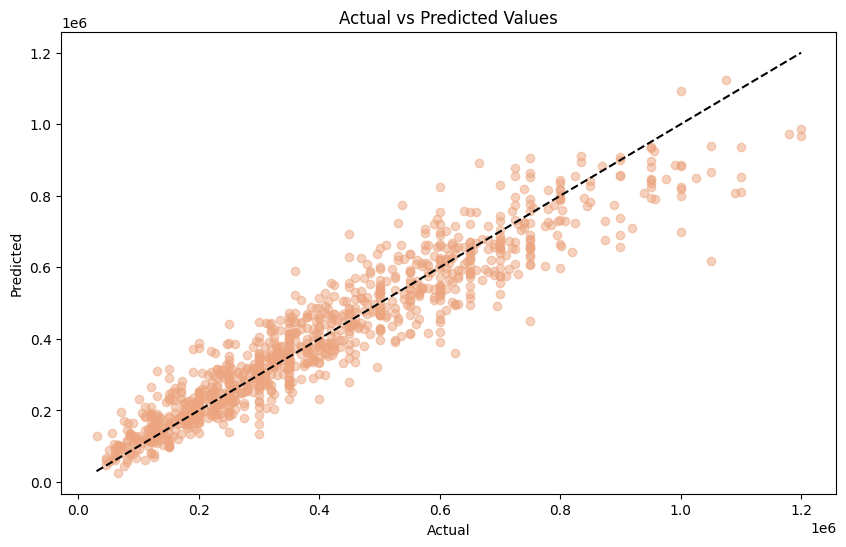

In [66]:
model_3_new_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_test_xg_new.ravel()})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(model_3_new_df['Actual'], model_3_new_df['Predicted'], alpha=0.5,color = "#eca57f")
plt.plot([model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], [model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], 'k--')  # Line y=x
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Comparing Performance of each model

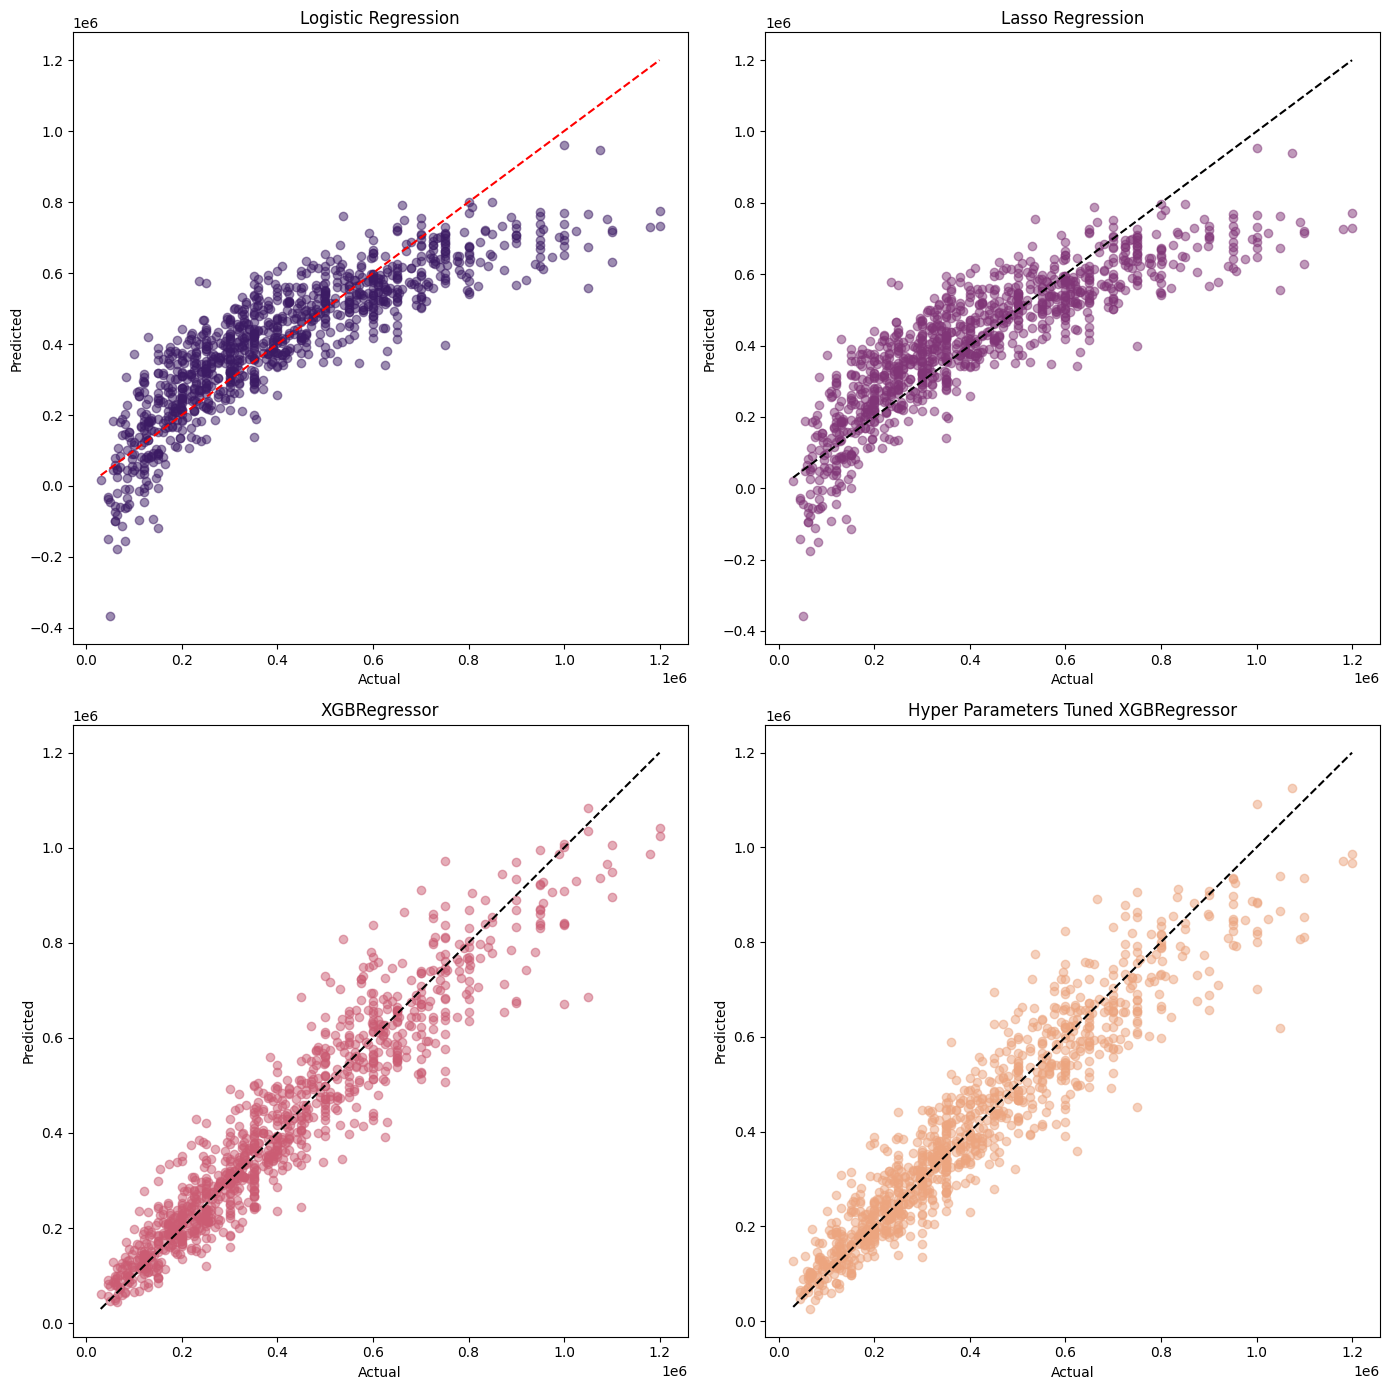

In [67]:
# Plotting the scatter plots
plt.figure(figsize=(14,14))

plt.subplot(2,2,1)
plt.scatter(model_1_df['Actual'], model_1_df['Predicted'], alpha=0.5, color = "#3c1b64")
plt.plot([model_1_df['Actual'].min(), model_1_df['Actual'].max()], [model_1_df['Actual'].min(), model_1_df['Actual'].max()], 'r--')  # Line y=x
plt.title('Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,2)
plt.scatter(model_2_df['Actual'], model_2_df['Predicted'], alpha=0.5,color = "#803577")
plt.plot([model_2_df['Actual'].min(), model_2_df['Actual'].max()], [model_2_df['Actual'].min(), model_2_df['Actual'].max()], 'k--')  # Line y=x
plt.title('Lasso Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,3)
plt.scatter(model_3_df['Actual'], model_3_df['Predicted'], alpha=0.5,color = "#cb5c73")
plt.plot([model_3_df['Actual'].min(), model_3_df['Actual'].max()], [model_3_df['Actual'].min(), model_3_df['Actual'].max()], 'k--')  # Line y=x
plt.title('XGBRegressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2,2,4)
plt.scatter(model_3_new_df['Actual'], model_3_new_df['Predicted'], alpha=0.5,color = "#eca57f")
plt.plot([model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], [model_3_new_df['Actual'].min(), model_3_new_df['Actual'].max()], 'k--')  # Line y=x
plt.title('Hyper Parameters Tuned XGBRegressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()

plt.show()

In [68]:
Metrics_df = pd.DataFrame({"Models":["Linear Regression", "Lasso Regression", "XGBRegressor", "Tuned XGBRegressor"],
                             "MSE_Train":[208363510143.90, 14020054162.97, 1440914331.97, 4219553904.87],
                             "MSE_test":[14243261520.19, 14316398695, 5295697239.01, 5867095905.10],
                             "MAE_train":[419608.30, 92181.95, 27773.37, 47911.97],
                             "MAE_test":[92014.63, 92297.86, 53718.25, 56668.19],
                             "R-Squared":[74, 74, 90, 89],
                             "Adjusted_R-Squared":[73, 73, 90, 89]
                             })

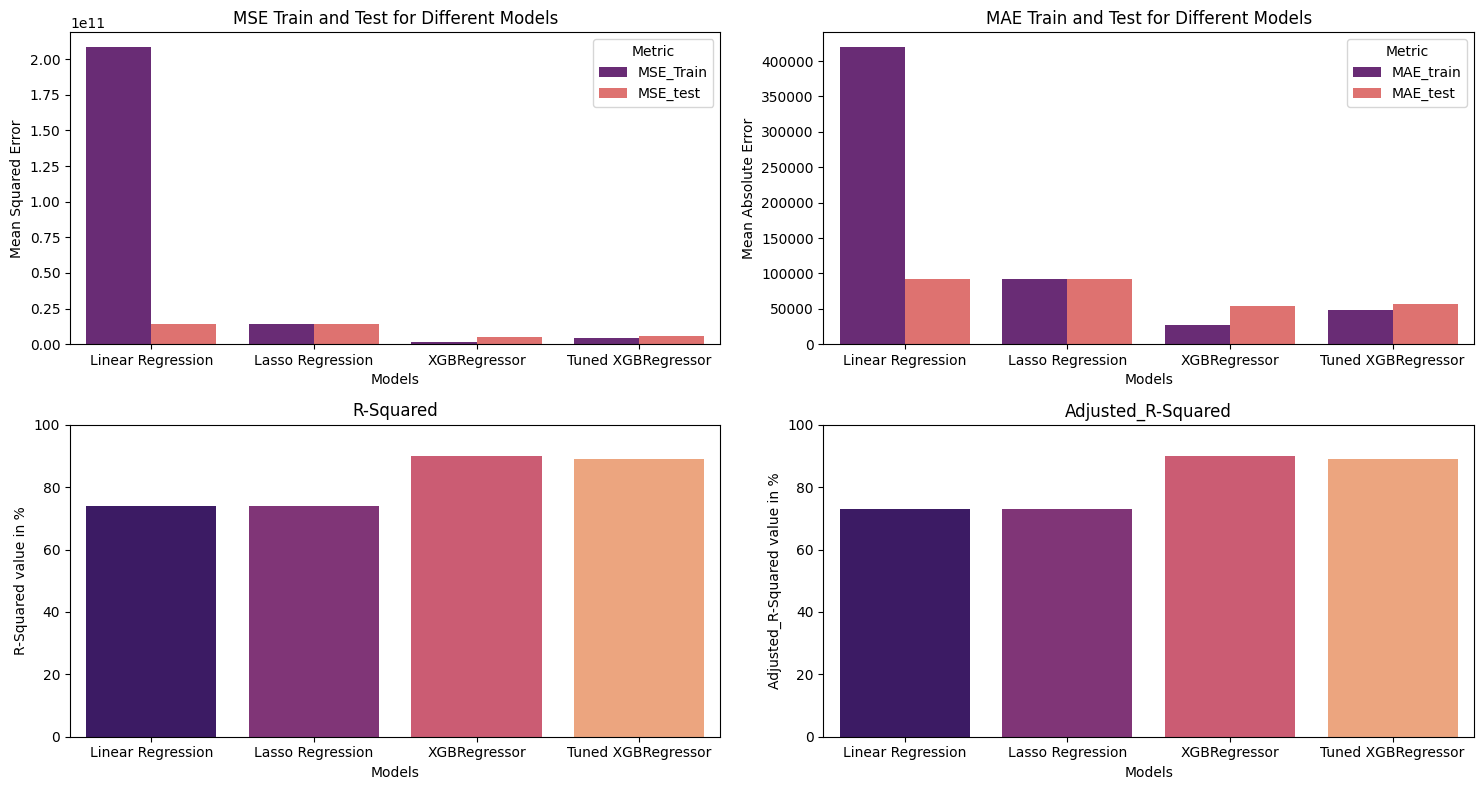

In [69]:
# Plotting the bar plots
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)

# Melt the DataFrame
melted_df_1 = Metrics_df.melt(id_vars='Models', value_vars=['MSE_Train', 'MSE_test'], var_name='Metric', value_name='Value')

# Create the barplot
sns.barplot(data=melted_df_1, x='Models', y='Value', hue='Metric', palette='magma')
plt.title('MSE Train and Test for Different Models')
plt.ylabel('Mean Squared Error')

plt.subplot(2,2,2)

# Melt the DataFrame
melted_df_2 = Metrics_df.melt(id_vars='Models', value_vars=['MAE_train', 'MAE_test'], var_name='Metric', value_name='Value')

# Create the barplot
sns.barplot(data=melted_df_2, x='Models', y='Value', hue='Metric', palette='magma')
plt.title('MAE Train and Test for Different Models')
plt.ylabel('Mean Absolute Error')

plt.subplot(2,2,3)
# Create the barplot
sns.barplot(data=Metrics_df, x='Models', y='R-Squared', hue='Models', palette='magma')
plt.title('R-Squared')
plt.ylim(0,100)
plt.ylabel('R-Squared value in %')

plt.subplot(2,2,4)
# Create the barplot
sns.barplot(data=Metrics_df, x='Models', y='Adjusted_R-Squared', hue='Models', palette='magma')
plt.title('Adjusted_R-Squared')
plt.ylim(0,100)
plt.ylabel('Adjusted_R-Squared value in %')

plt.tight_layout()
plt.show()


### Important Features

Below are the all the Features and their importance in Model performance and prediction.

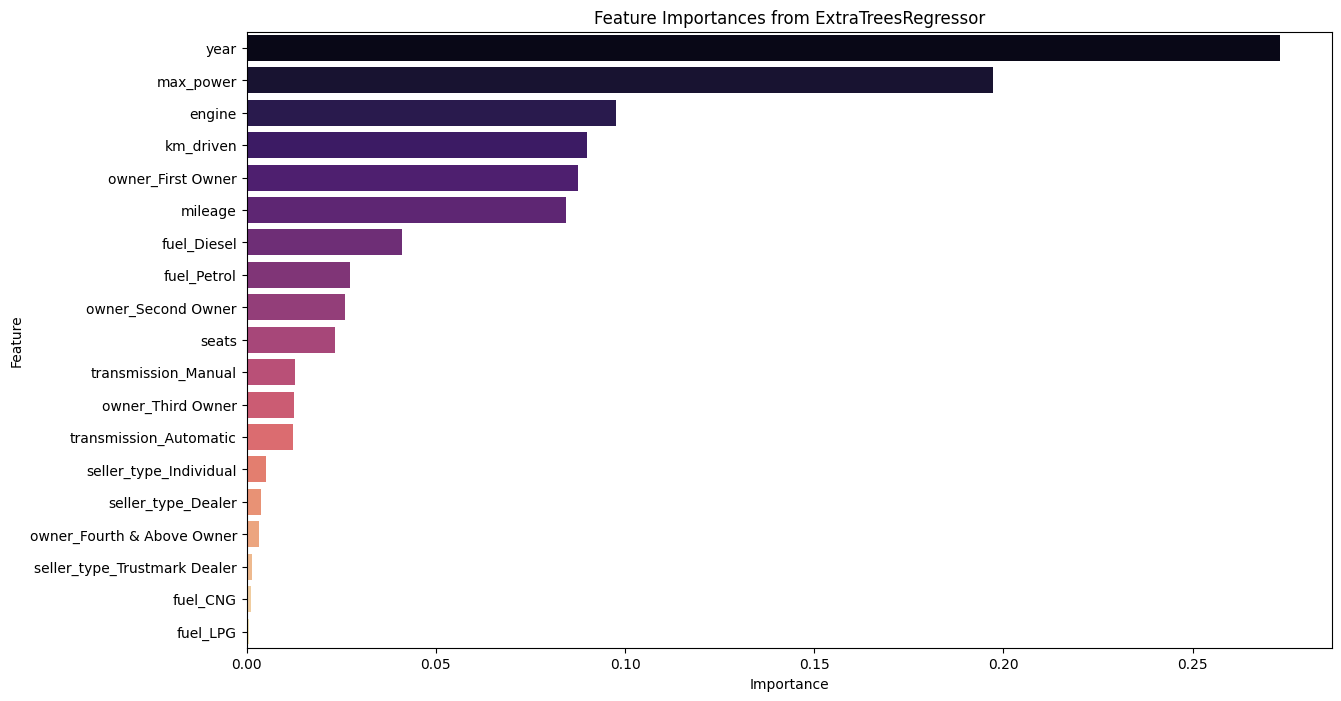

In [70]:
# Initialize the ExtraTreesRegressor model
extra_tree_forest = ExtraTreesRegressor(n_estimators=1000, criterion='squared_error', max_features=4)

# Train the model on the training data
extra_tree_forest.fit(X_train, y_train)

# Compute the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Display feature importance
# print("Feature Importances:", feature_importance)

feature_names = X.columns
# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df,hue='Feature', palette='magma')
plt.title('Feature Importances from ExtraTreesRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Conclusion

Upon evaluating various regression models, we find that both XGBRegressor and Tuned XGBRegressor exhibit superior performance compared to traditional linear and Lasso regression models. Specifically, the XGBRegressor model demonstrates high predictive accuracy with the highest R-Squared and Adjusted R-Squared values, indicating its robustness in capturing the underlying patterns in the training data.

However, the substantial gap between the training and testing metrics for the XGBRegressor model, notably the MSE and MAE, points to a potential overfitting issue. This discrepancy suggests that while the model performs exceptionally well on the training data, its predictive capability on unseen data is less reliable.

In contrast, the Tuned XGBRegressor achieves a more balanced performance. Although it slightly sacrifices training accuracy compared to the untuned version, it significantly improves generalization to the testing data. The relatively smaller difference between its training and testing errors indicates that the Tuned XGBRegressor is less prone to overfitting and can provide more consistent and reliable predictions across different datasets.

Given the trade-off between model complexity and generalization, the Tuned XGBRegressor emerges as the optimal choice for our final predictive model. It offers a harmonious balance, ensuring robust performance while maintaining the integrity of predictions across new, unseen data.

In summary, while the XGBRegressor shows impressive initial results, the Hyper Parameter Tuned XGBRegressor stands out as the preferred model due to its ability to deliver stable and dependable predictions, making it the most suitable model for deployment in this project.